In [ ]:
#!/usr/bin/env python3
"""
Trains a convolutional neural network to classify the CIFAR 10 dataset:
"""
%tensorflow_version 1.x
import tensorflow.keras as K
import tensorflow as tf


def preprocess_data(X, Y):
    """
    a function that trains a convolutional neural network to classify the
    CIFAR 10 dataset
    :param X: X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
    CIFAR 10 data, where m is the number of data points
    :param Y: Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
    labels for X
    :return: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    """
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p


if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
    print((x_train.shape, y_train.shape))
    x_train, y_train = preprocess_data(x_train, y_train)
    x_test, y_test = preprocess_data(x_test, y_test)
    print((x_train.shape, y_train.shape))

    input_t = K.Input(shape=(32, 32, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    
    
    for layer in res_model.layers[:143]:
        layer.trainable = False

    for i, layer in enumerate(res_model.layers):
        print(i, layer.name, "-", layer.trainable)

    to_res = (224, 224)
    model = K.models.Sequential()
    model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(10, activation='softmax'))

    

    check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

    model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1,
                        validation_data=(x_test, y_test),
                        callbacks=[check_point])
    model.summary()
    # model.save("cifar10.h5")

((50000, 32, 32, 3), (50000, 1))
((50000, 32, 32, 3), (50000, 10))
0 input_10 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2

In [ ]:
# preprocess_data = __import__('0-transfer').preprocess_data

# fix issue with saving keras applications
K.learning_phase = K.backend.learning_phase

_, (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(X, Y)
model = K.models.load_model('cifar10.h5')
model.evaluate(X_p, Y_p, batch_size=128, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.1875 - acc: 0.9492


[0.1874579804778099, 0.9492]

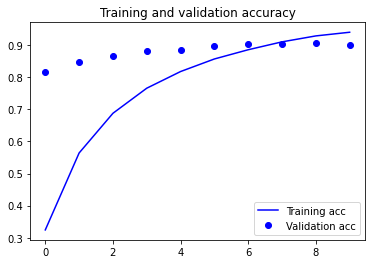

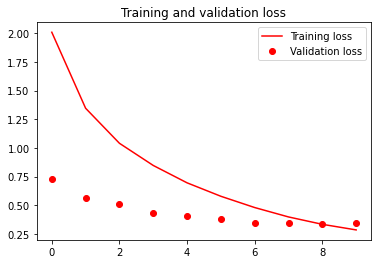

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()